Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it.

First, load the dataset.

Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

In [157]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import seaborn as sns
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

engine.dispose()

df.isnull().sum()*100/df.isnull().count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [158]:
# DATA CLEANING

# Strip the whitespace from the column names
df = df.rename(columns=lambda x: x.strip())

# I'm going to remove rows with a missing life expectancy since that's what we're trying to model, and there are very few missing
df = df.dropna(axis=0, subset=['Life expectancy'])


# Going to drop the 2010 Haiti earthquake value since it's a major outlier and only one row
df = df[df['Life expectancy'] > 37]

# For certain counties, all Life expectancies and schooling figures are 0. I'll drop these
df = df[df['Income composition of resources'] > 0]
df = df[df['Schooling'] > 0]


# Ignore
# They are all 0 for a particular country, so can't interpolate
# countries = df['Country'].unique()
# for c in countries:
#     df.loc[df['Country'] == c, 'Income composition of resources'] = df.loc[df['Country'] == c, 'Income composition of resources'].interpolate()


# print(df.columns)
# print(df)
# df.info()
# df.nunique()
# df.describe()
# df.isnull()
df.isnull().sum()*100/df.isnull().count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.000000
Adult Mortality                     0.000000
infant deaths                       0.000000
Alcohol                             6.560485
percentage expenditure              0.000000
Hepatitis B                        16.837315
Measles                             0.000000
BMI                                 0.796359
under-five deaths                   0.000000
Polio                               0.113766
Total expenditure                   6.636329
Diphtheria                          0.113766
HIV/AIDS                            0.000000
GDP                                10.163064
Population                         17.292378
thinness  1-19 years                0.796359
thinness 5-9 years                  0.796359
Income composition of resources     0.000000
Schooling                           0.000000
dtype: flo

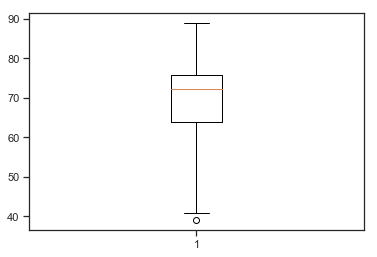

In [159]:
plt.boxplot(df['Life expectancy'], whis=2)
# plt.title("Box plot of video views (whis=20)")
plt.show()

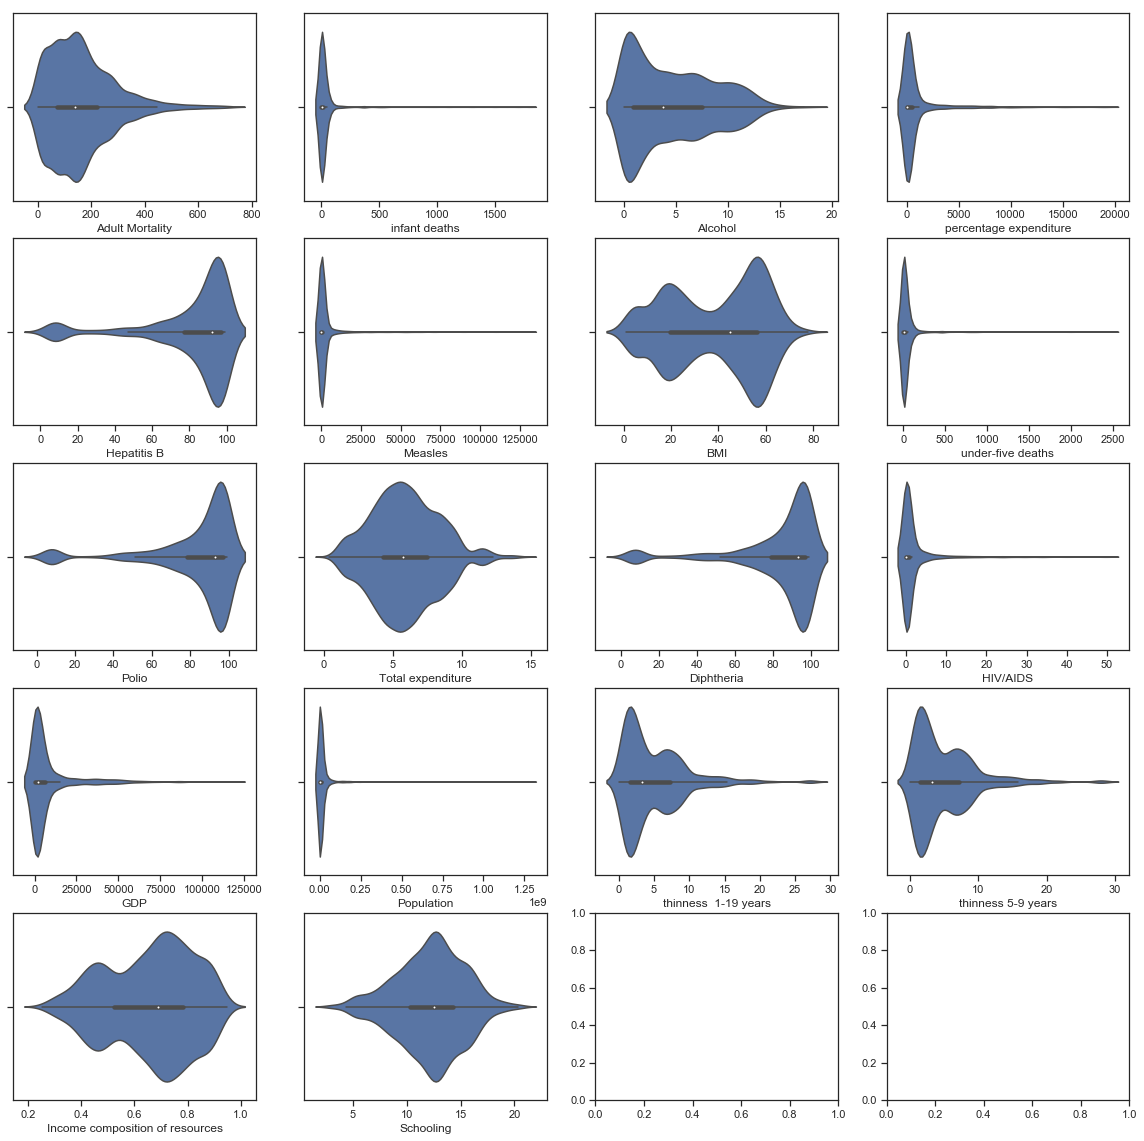

In [160]:
columns = list(df.columns)
remove = {'Country', 'Year', 'Life expectancy', 'Status'}
columns = [e for e in columns if e not in remove]


f, axes = plt.subplots(5, 4, figsize=(20, 20))

sns.violinplot(x = df[columns[0]], ax=axes[0, 0])
sns.violinplot(x = df[columns[1]], ax=axes[0, 1])
sns.violinplot(x = df[columns[2]], ax=axes[0, 2])
sns.violinplot(x = df[columns[3]], ax=axes[0, 3])
sns.violinplot(x = df[columns[4]], ax=axes[1, 0])
sns.violinplot(x = df[columns[5]], ax=axes[1, 1])
sns.violinplot(x = df[columns[6]], ax=axes[1, 2])
sns.violinplot(x = df[columns[7]], ax=axes[1, 3])
sns.violinplot(x = df[columns[8]], ax=axes[2, 0])
sns.violinplot(x = df[columns[9]], ax=axes[2, 1])
sns.violinplot(x = df[columns[10]], ax=axes[2, 2])
sns.violinplot(x = df[columns[11]], ax=axes[2, 3])
sns.violinplot(x = df[columns[12]], ax=axes[3, 0])
sns.violinplot(x = df[columns[13]], ax=axes[3, 1])
sns.violinplot(x = df[columns[14]], ax=axes[3, 2])
sns.violinplot(x = df[columns[15]], ax=axes[3, 3])
sns.violinplot(x = df[columns[16]], ax=axes[4, 0])
sns.violinplot(x = df[columns[17]], ax=axes[4, 1])

Variables vs. Life Expectancy


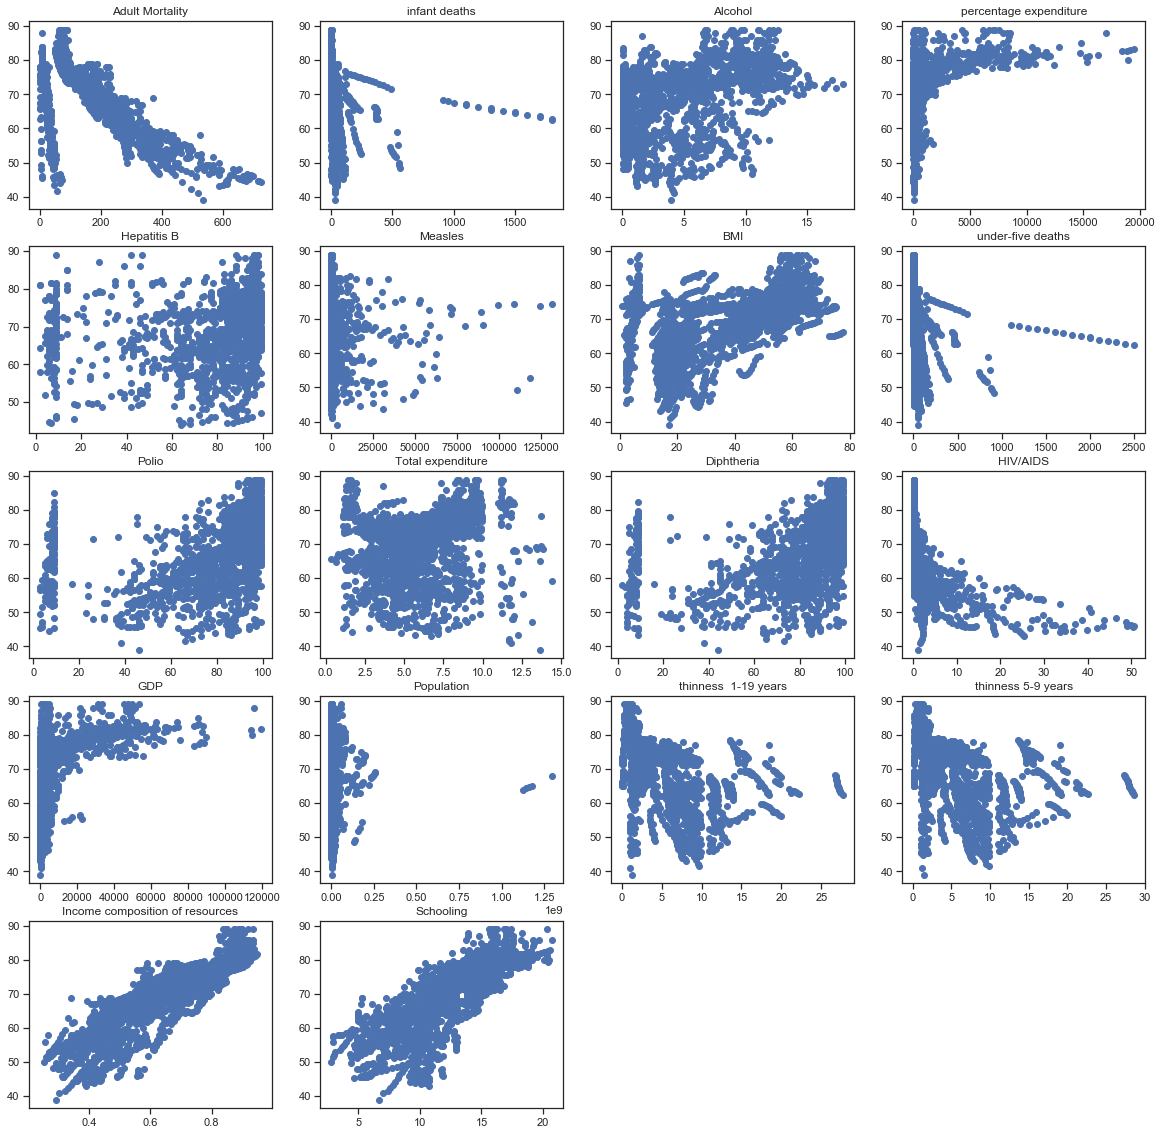

In [162]:
plt.figure(figsize=(20, 20))

print('Variables vs. Life Expectancy')

for i in range(1, 19):
    plt.subplot(5, 4, i)
    plt.scatter(x=df[columns[i - 1]], y=df['Life expectancy'])
    plt.title(columns[i - 1])

plt.show()

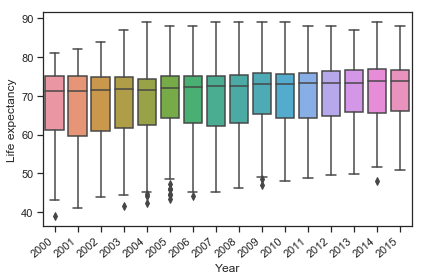

In [163]:
yr = sns.boxplot(x = df['Year'], y = df['Life expectancy'])
yr.set_xticklabels(yr.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

In [133]:
country = df.groupby('Country')['Life expectancy'].mean()

print(country)

Country
Afghanistan                                             58.19375
Albania                                                 75.15625
Algeria                                                 73.61875
Angola                                                  49.01875
Antigua and Barbuda                                     75.05625
Argentina                                               75.15625
Armenia                                                 73.40000
Australia                                               81.81250
Austria                                                 81.48125
Azerbaijan                                              70.73125
Bahamas                                                 74.28750
Bahrain                                                 75.72500
Bangladesh                                              69.30000
Barbados                                                74.35625
Belarus                                                 69.90625
Belgium          

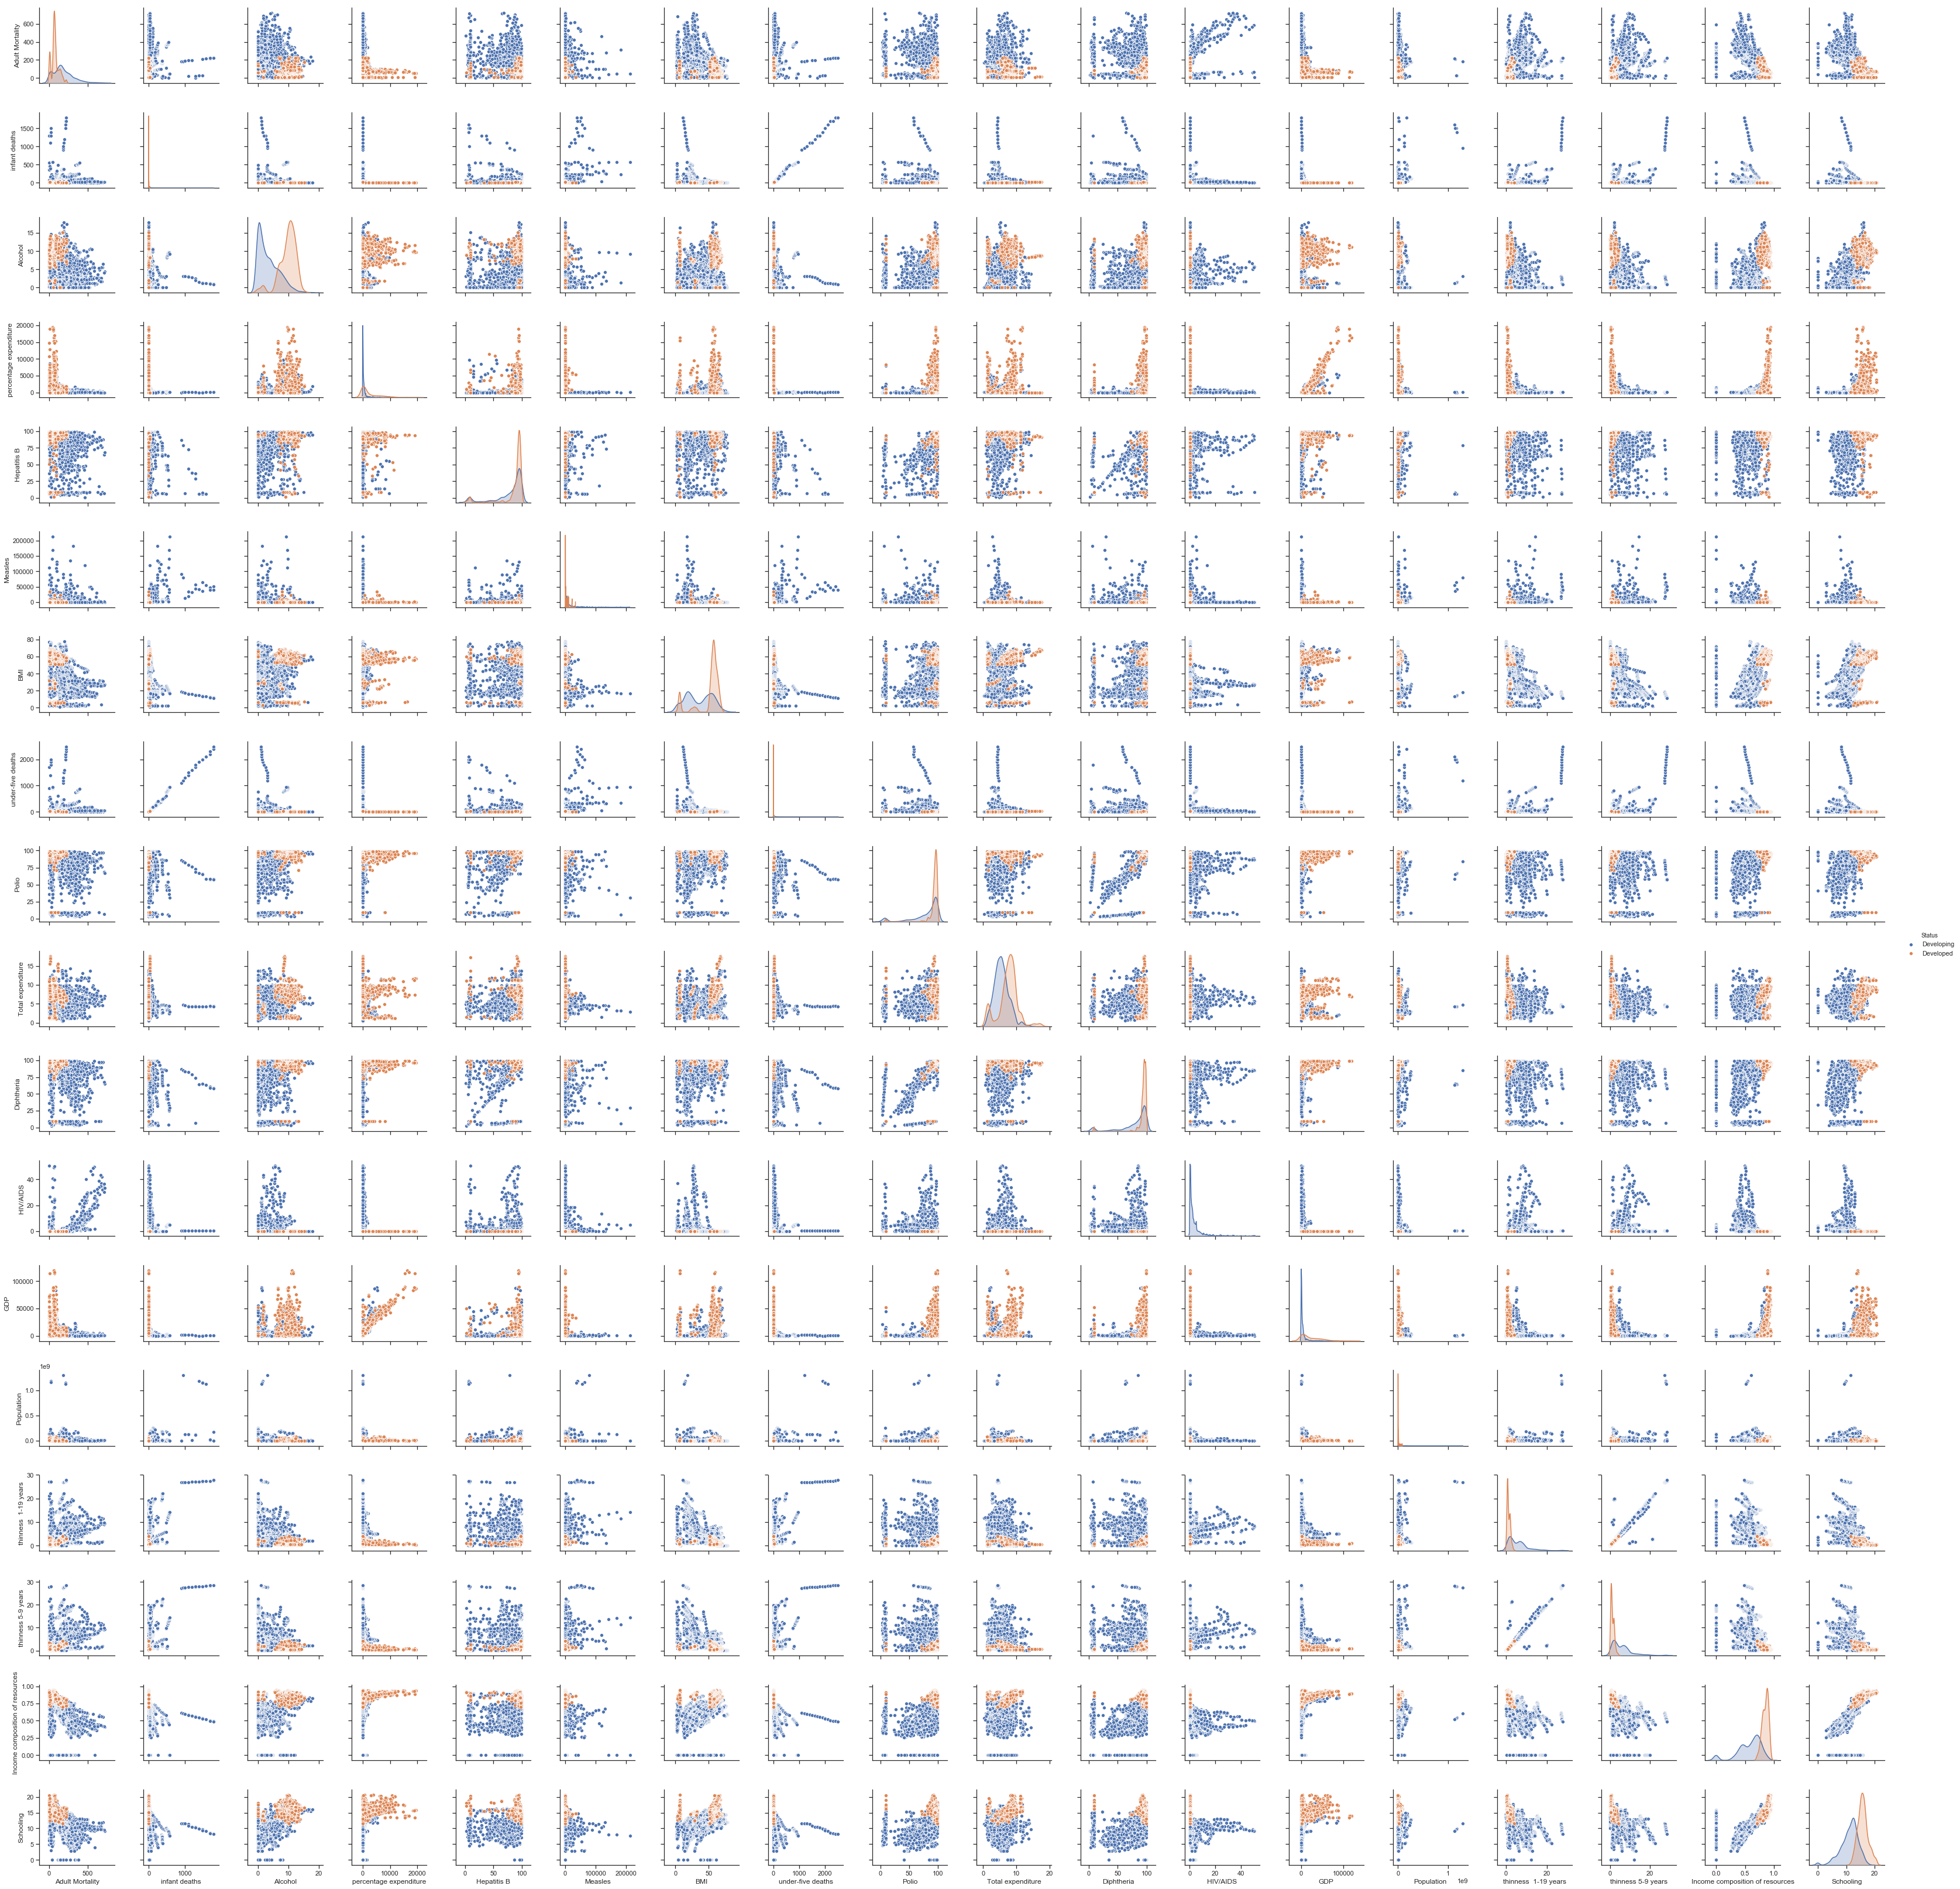

In [134]:
sns.set(style="ticks")

columns2 = list(df.columns)
remove2 = {'Country', 'Life expectancy', 'Status'}
columns2 = [e for e in columns if e not in remove2]

sns.pairplot(df, vars = columns2, hue='Status')

Right away I can see a couple variables that, despite being correlated with life expectancy, can be thrown away due the fact that I assume they are all causally linked with the same underlying. For exmaple, life expectancy seems to go down as adult mortality and AIDS become more common. Seems obvious, since as more adults die for various reasons life expectancy will go down. Yet these are only a subset of cause of death and we're looking for why these things are occuring. Finding a variable driving all of these would be of more use.

Both Schooling and Income Composition of Resources stand out to me. It seems from looking at the pairplot above that two variables are highly correlated, and I'll assume it's the schooling that's driving the income composition figure. As such I'll be selecting Schooling as the sole variable for the model, as it's highly correlated with Life Expectancy and I believe it is causally linked with the rest of the variables showing a correlation with life expectancy. I feel this will optimize the tradeoff between keeping as little amount of the variables as possible while capturing a sifficient amount of the total variance in the data.